In [1]:
## Importing the libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} columns. ')

Our data has 4345 rows and 9 columns. 


## Preprocessing

In [4]:
df.describe(include = 'all')     ## Gives the descriptives of all the variables

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


* From the count we can see that it is not same for all the variables. Hence, we have missing values in columns: Price and EngineV
* There are 312 unique models, it would be hard to implement Lienar Model.
* Registration has nearly all the values, i.e., 3947/4345 as 'Yes', it may not be great to use. Dropping would be better.

In [5]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
df['Model'].value_counts(normalize = True)

E-Class             0.045800
A6                  0.039586
Vito                0.039356
Kangoo              0.033602
Camry               0.030840
                      ...   
T2 (Transporter)    0.000230
545                 0.000230
M6                  0.000230
R 320               0.000230
CLK 280             0.000230
Name: Model, Length: 312, dtype: float64

Here, we are dropping the Model column as it has too many unique categories, i.e., 319.

In [7]:
del(df['Model'])

In [8]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


## Dealing with Missing Values

In [9]:
df.isna().sum()     ## Price and EngineV has missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
df.dropna(axis = 0, inplace = True)

In [11]:
df.isna().sum()      ## No missing values now

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Exploring PDFs

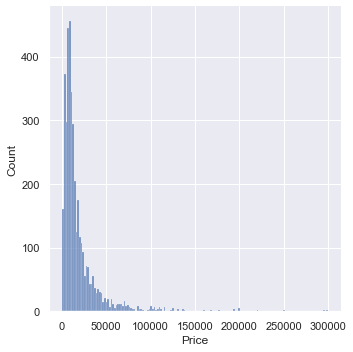

In [12]:
## Now, we are going to look at the distribution of the data in each variable

sns.displot(df['Price'])

## Data is not normally distributed

## Dealing with Outliers

In [13]:
q = df['Price'].quantile(0.99)     ## Top 1% values
df[df['Price'] < q].describe()    ## This is better than the previous descriptives

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


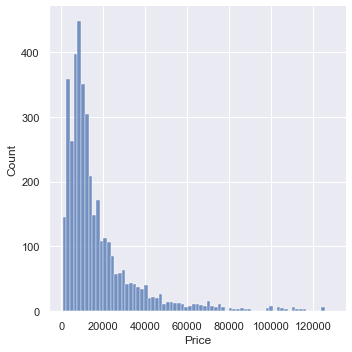

In [14]:
sns.displot(df[df['Price'] < q]['Price'])    ## Better than the previous one

In [15]:
df_1 = df[df['Price'] < q]

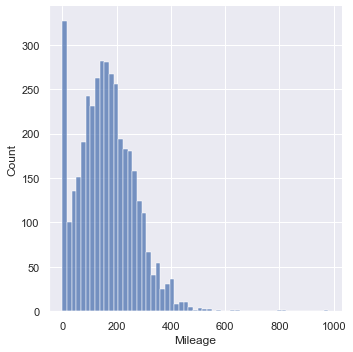

In [16]:
sns.displot(df_1['Mileage'])   ## Mileage also has similar distribution (Right Skewed)

In [17]:
df_2 = df_1[df_1['Mileage'] < df_1['Mileage'].quantile(0.99)]

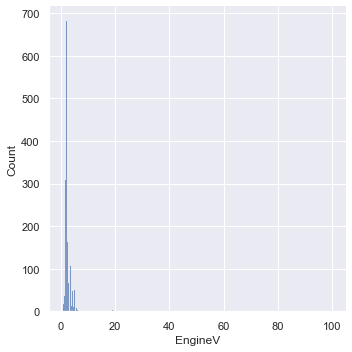

In [18]:
sns.displot(df_2['EngineV'])

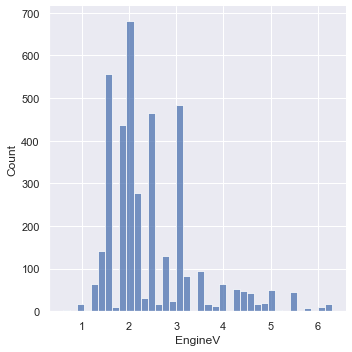

In [19]:
sns.displot(df_2[df_2['EngineV'] < 6.5]['EngineV'])   ## Better distributed as 6.5 is the max value for EngineV

In [20]:
df_3 = df_2[df_2['EngineV'] < 6.5]

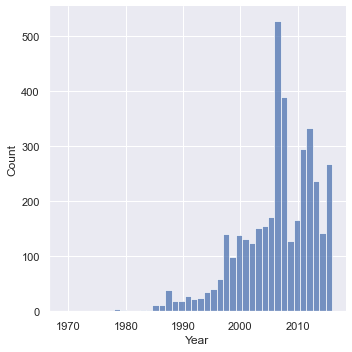

In [21]:
sns.displot(df_3['Year'])     ## We can see

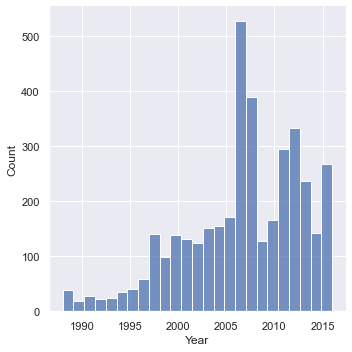

In [22]:
q = df_3['Year'].quantile(0.01)    ## Top 1% Values

sns.displot(df_3[df_3['Year'] > q]['Year'])

In [23]:
df_cleaned = df_3[df_3['Year'] > q]    ## Final Cleand Data

In [24]:
df_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [25]:
df_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [26]:
df_final = df_cleaned.reset_index(drop = True)
df_final.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [28]:
df_final.shape

(3867, 8)

## Checking OLS assumptions

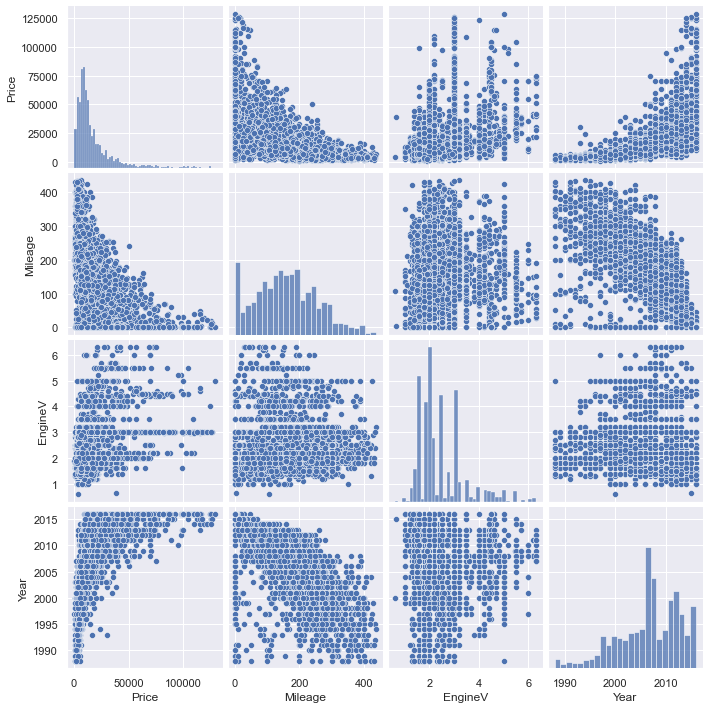

In [33]:
sns.pairplot(df_final)

It can be seen that there is no Linear relationship between Price Vs Year, Price Vs Mileage and Price Vs EngineV. As they look explonential rather than linear. So, we will have to perform transformatuion on them.

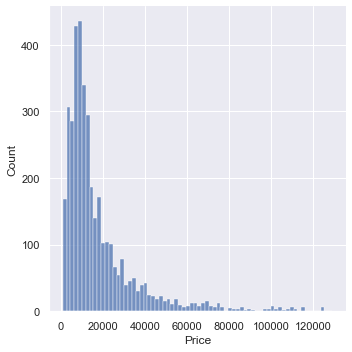

In [34]:
sns.displot(df_final['Price'])

In [35]:
## Performing Log transformation

log_price = np.log(df_final['Price'])
df_final['log_price'] = log_price

<AxesSubplot:xlabel='log_price', ylabel='Mileage'>

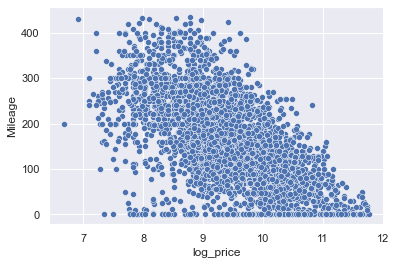

In [38]:
sns.scatterplot(x = df_final['log_price'], y = df_final['Mileage'])

<AxesSubplot:xlabel='log_price', ylabel='EngineV'>

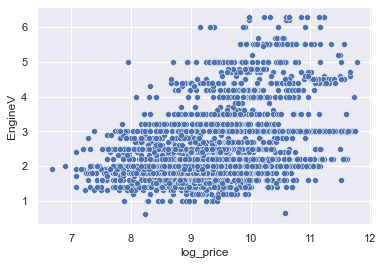

In [39]:
sns.scatterplot(x = df_final['log_price'], y = df_final['EngineV'])

<AxesSubplot:xlabel='log_price', ylabel='Year'>

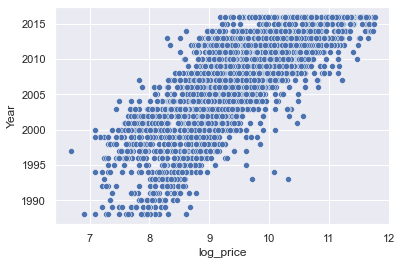

In [40]:
sns.scatterplot(x = df_final['log_price'], y = df_final['Year'])

Now, the distributions are much more Linear.

In [41]:
del(df_final['Price'])

## Multicollinearity

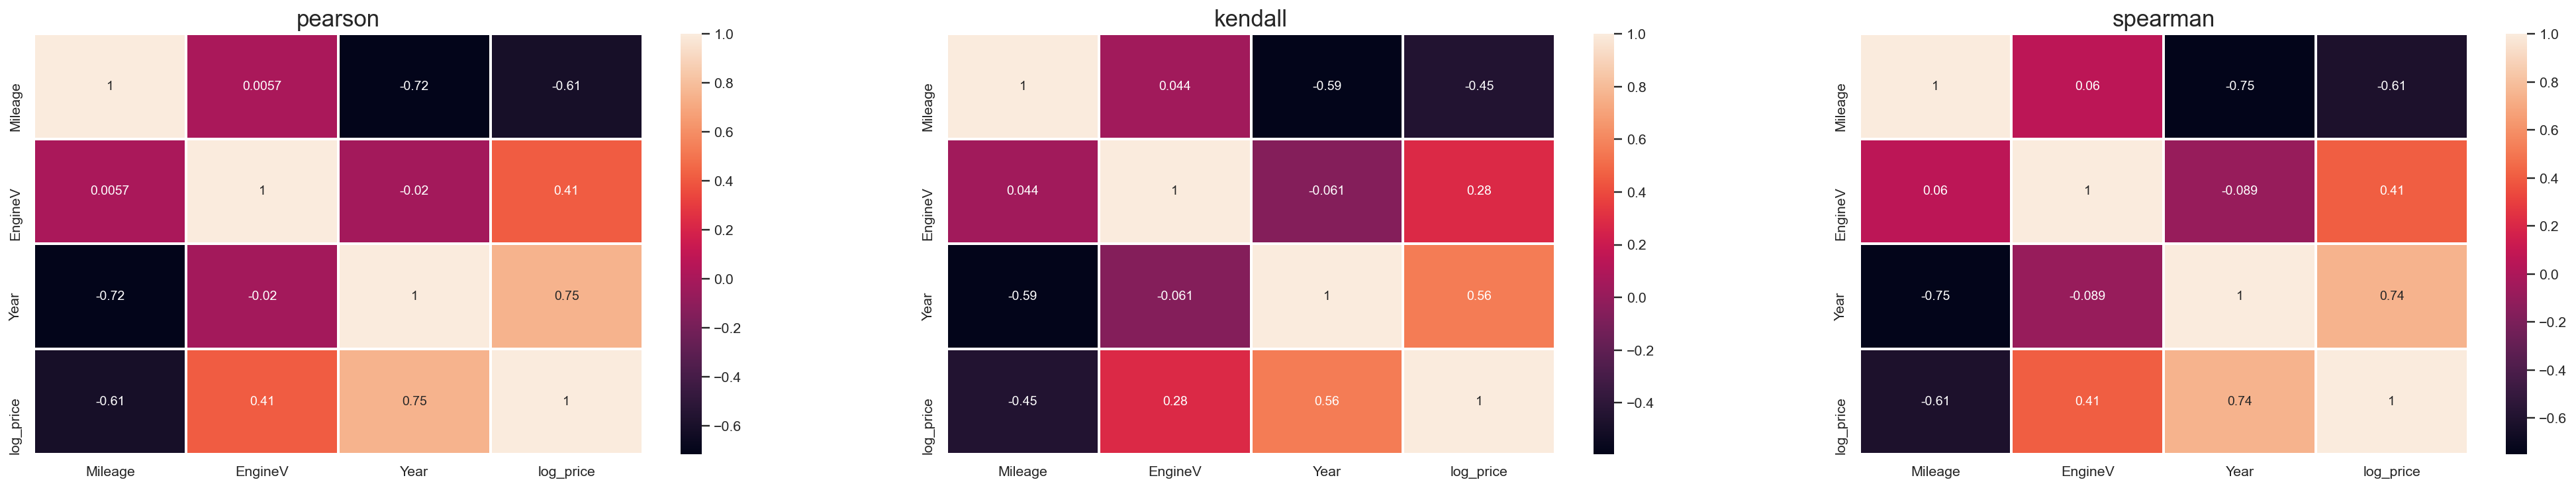

In [45]:
plt.figure(figsize = (36, 6), dpi = 140)

for j, i in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1, 3, j + 1)
    correlation = df_final.dropna().corr(method = i)
    sns.heatmap(correlation, linewidth = 2, annot = True)  ## annot shows the values of correlation also.
    plt.title(i, fontsize=18)

It can be seen that 'Year' and 'Mileage' are highly correlated, hence, we will remove 'Year' from our data.

In [46]:
del(df_final['Year'])

In [47]:
df_final.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Create Dummy Variables

In [49]:
df_dummy = pd.get_dummies(df_final, drop_first=True)

In [50]:
df_dummy.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [51]:
df_dummy.shape

(3867, 18)

In [56]:
df_final.nunique()

Brand             7
Body              6
Mileage         377
EngineV          55
Engine Type       4
Registration      2
log_price       849
dtype: int64

## Rearranging

In [69]:
cols = ['log_price','Brand_BMW', 'Mileage', 'EngineV','Brand_Mercedes-Benz','Brand_Mitsubishi',
                  'Brand_Renault', 'Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan',
                  'Body_vagon', 'Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol',
                  'Registration_yes']

In [70]:
df_pre = df_dummy[cols]

df_pre.head()

,log_price,Brand_BMW,Mileage,EngineV,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,1,277,2.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,0,427,2.9,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,0,358,5.0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,0,120,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

In [71]:
target = df_pre['log_price']
inputs = df_pre.drop(['log_price'], axis = 1)

In [72]:
## Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [73]:
input_scaled = scaler.transform(inputs)

In [74]:
## Train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, target, test_size = 0.2, random_state = 365)

In [75]:
## Creating Regression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [76]:
y_hat = reg.predict(x_train)

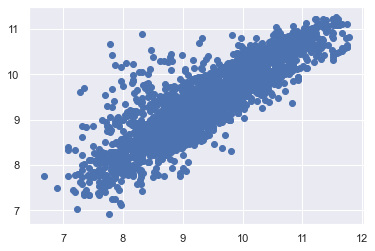

In [79]:
plt.scatter(y_train, y_hat)
plt.show()

<AxesSubplot:xlabel='log_price', ylabel='Density'>

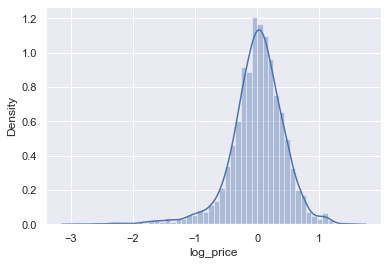

In [83]:
## Residual = y_train - y_hat

sns.distplot(y_train - y_hat)


In [84]:
reg.score(x_train, y_train)

0.744996578792662

In [87]:
## Finding weights and bias

reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.sort_values(by = 'Weights', ascending = False)

,Features,Weights
16,Registration_yes,0.320473
2,EngineV,0.209035
0,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
14,Engine Type_Other,-0.033368
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
9,Body_other,-0.101444
13,Engine Type_Gas,-0.121490
11,Body_vagon,-0.129887


In [88]:
## Testing

y_hat_test = reg.predict(x_test)

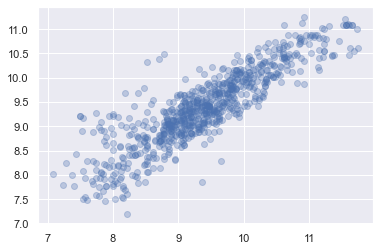

In [91]:
plt.scatter(y_test, y_hat_test, alpha = 0.3)
plt.show()

In [93]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [94]:
df_pf['Target'] = np.exp(y_test)      ## Many missing values
df_pf

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [95]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [96]:
df_pf['Target'] = np.exp(y_test)      ## No missing values
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [98]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']


In [99]:
df_pf['Difference(%)'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference(%)
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [101]:
df_pf.describe()

,Predictions,Target,Residual,Difference(%)
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [102]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = ['Difference(%)'])

,Predictions,Target,Residual,Difference(%)
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
